# Multi-class Image Classification of the CIFAR10 using Convolutional Neural Network (CNN)

## Importing Libraries

In [1]:
#%pip install --upgrade pip keras tensorflow numpy pandas sklearn scikit-learn matplotlib seaborn visualkeras scikeras

In [2]:
# code for preventing tensorflow to show an red 'error' message after the imports
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [3]:
import sys
import numpy as np
import sklearn as sk
import pandas as pd
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
import visualkeras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [4]:
print(f'Python version: {sys.version}')
print(f'Numpy version: {np.__version__}')
print(f'Pandas version: {pd.__version__}')
print(f'SKLearn version: {sk.__version__}')
print(f'Tensorflow version: {tf.__version__}')
print(f'Matplotlib version: {matplotlib.__version__}')
print(f'Seaborn version: {sns.__version__}')
print(f'Keras version: {keras.__version__}')

Python version: 3.11.2 (main, May  6 2023, 17:16:28) [GCC 11.3.0]
Numpy version: 1.23.5
Pandas version: 2.0.2
SKLearn version: 1.2.2
Tensorflow version: 2.12.0
Matplotlib version: 3.7.1
Seaborn version: 0.12.2
Keras version: 2.12.0


## Loading and Preprocessing the Data

In [5]:
# importing the CIFAR-10 dataset from Keras and dividing it into traning and test set

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [6]:
# this shows that there are 50,000 examples in the training dataset and 10,000 in the test dataset
# and that the images are a square with 32×32 pixels and color (3 channels)

print (f'Shapes:\nX_train: {X_train.shape}\nX_test: {X_test.shape}\nY_train: {Y_train.shape}\nY_train: {Y_train.shape}')

Shapes:
X_train: (50000, 32, 32, 3)
X_test: (10000, 32, 32, 3)
Y_train: (50000, 1)
Y_train: (50000, 1)


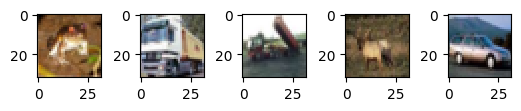

In [7]:
# plot first 5 images

for i in range(5):
    plt.subplot(551 + i)
    plt.imshow(X_train[i])

plt.show()

In [8]:
# model and data parameters

num_class = 10
input_shape = (32, 32, 3)

In [9]:
# normalizing the pixels as the values range from 0 to 256, 
# dividing by 255 so it ranges between 0 and 1

X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

# and one-hot-encode the target, converting vectors to binary

Y_train = to_categorical(Y_train,num_classes=10)
Y_test = to_categorical(Y_test,num_classes=10)

Include the code for EarlyStopping

In [10]:
# include EarlyStopping
es = EarlyStopping(patience = 5, verbose = 2)

## Models

### Base Model

Two convolutional layers with max pooling, a flatten layer, a dense layer and a final output dense layer

#### Building the model

In [11]:
# base model architecture

base_model = Sequential()

base_model.add(Conv2D(32,(3,3),input_shape = (32,32,3), activation='relu'))
base_model.add(MaxPooling2D(pool_size = (2,2)))

base_model.add(Conv2D(64,(3,3),input_shape = (32,32,3),activation='relu'))
base_model.add(MaxPooling2D(pool_size = (2,2)))

base_model.add(Flatten())
base_model.add(Dense(256, activation ='relu'))
base_model.add(Dense(10, activation ='softmax'))

base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 256)               5

#### Training the model

In [12]:
# compiling the base model
base_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# base model fitting
base_model_history = base_model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), callbacks = [es])

Epoch 1/100
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3967 - accuracy: 0.4976 - val_loss: 1.1474 - val_accuracy: 0.5932
Epoch 2/100
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0369 - accuracy: 0.6374 - val_loss: 0.9878 - val_accuracy: 0.6525
Epoch 3/100
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8740 - accuracy: 0.6963 - val_loss: 0.9397 - val_accuracy: 0.6759
Epoch 4/100
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7529 - accuracy: 0.7372 - val_loss: 0.8723 - val_accuracy: 0.7016
Epoch 5/100
1563/1563 [==============================] - 12s 7ms/step - loss: 0.6480 - accuracy: 0.7744 - val_loss: 0.8854 - val_accuracy: 0.7043
Epoch 6/100
1563/1563 [==============================] - 12s 7ms/step - loss: 0.5459 - accuracy: 0.8085 - val_loss: 0.8955 - val_accuracy: 0.7111
Epoch 7/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4483 - accuracy: 0.8434 - val_loss: 0.9651 -

#### Evaluating the model

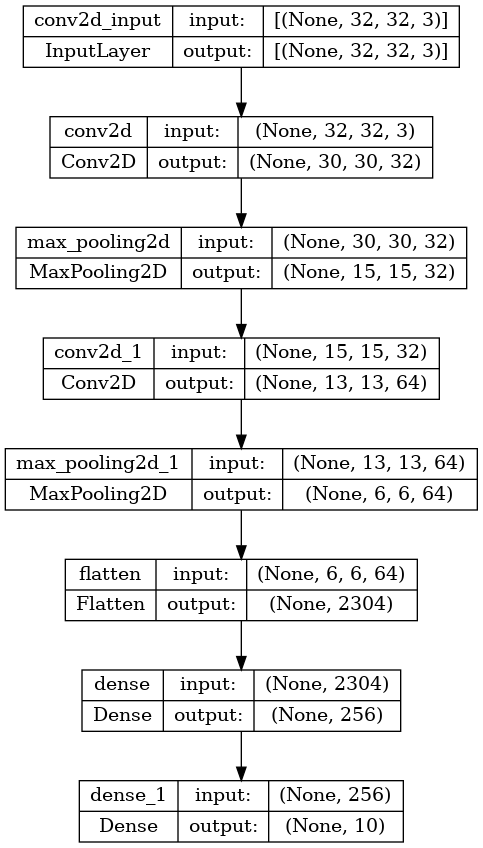

In [13]:
# plotting the architecture of base model

plot_model(base_model, show_shapes=True, show_layer_names=True)

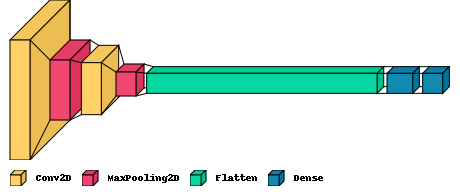

In [14]:
# plotting the model of base model

visualkeras.layered_view(base_model, legend=True)

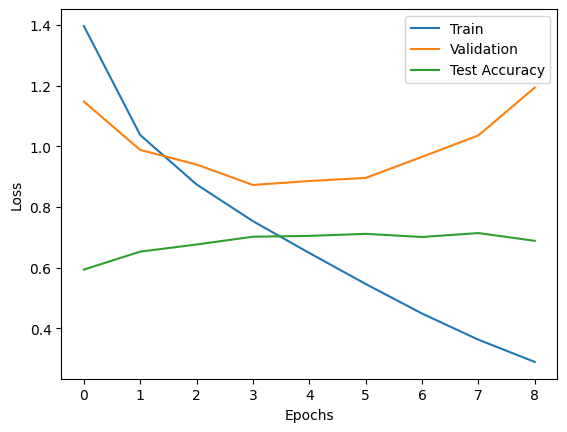

In [15]:
# base model evaluation

plt.plot(base_model_history.history['loss'])
plt.plot(base_model_history.history['val_loss'])
plt.plot(base_model_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation', 'Test Accuracy'])
plt.savefig('base_model_graph.png')
plt.show()

In [16]:
# base model scores

base_model_score = base_model.evaluate(X_test, Y_test, verbose=2)
print("Test loss:", base_model_score[0])
print("Test accuracy:", base_model_score[1])

313/313 - 1s - loss: 1.1933 - accuracy: 0.6881 - 798ms/epoch - 3ms/step
Test loss: 1.1933271884918213
Test accuracy: 0.6880999803543091


### Model 1 - dropout

Adding dropout layers to the base model 

#### Building the model

In [17]:
# model 1 architecture

model_1 = Sequential()

model_1.add(Conv2D(32,(3,3),input_shape = (32,32,3),activation='relu'))
model_1.add(MaxPooling2D(pool_size = (2,2)))
model_1.add(Dropout(0.2)) 

model_1.add(Conv2D(64,(3,3),input_shape = (32,32,3),activation='relu'))
model_1.add(MaxPooling2D(pool_size = (2,2)))
model_1.add(Dropout(0.2)) 

model_1.add(Flatten())
model_1.add(Dropout(0.3))

model_1.add(Dense(265, activation ='relu'))
model_1.add(Dropout(0.4))

model_1.add(Dense(10, activation ='softmax'))

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)         

#### Training the model

In [18]:
# compiling model 1
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model 1 fitting
model_1_history = model_1.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), callbacks = [es])

Epoch 1/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5931 - accuracy: 0.4214 - val_loss: 1.2540 - val_accuracy: 0.5563
Epoch 2/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2745 - accuracy: 0.5454 - val_loss: 1.1156 - val_accuracy: 0.6199
Epoch 3/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1734 - accuracy: 0.5850 - val_loss: 1.0031 - val_accuracy: 0.6582
Epoch 4/100
1563/1563 [==============================] - 16s 11ms/step - loss: 1.1026 - accuracy: 0.6109 - val_loss: 0.9580 - val_accuracy: 0.6733
Epoch 5/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0509 - accuracy: 0.6298 - val_loss: 0.9493 - val_accuracy: 0.6680
Epoch 6/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0142 - accuracy: 0.6421 - val_loss: 0.8910 - val_accuracy: 0.6924
Epoch 7/100
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9752 - accuracy: 0.6568 - val_loss: 0

#### Evaluating the model

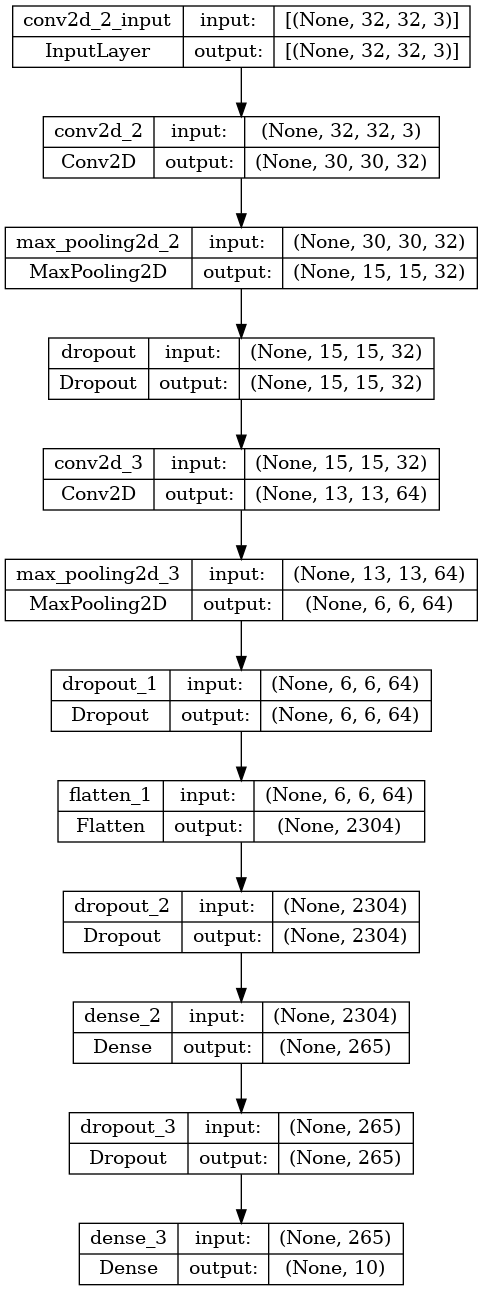

In [19]:
# plotting the architecture of model 1

plot_model(model_1, show_shapes=True, show_layer_names=True)

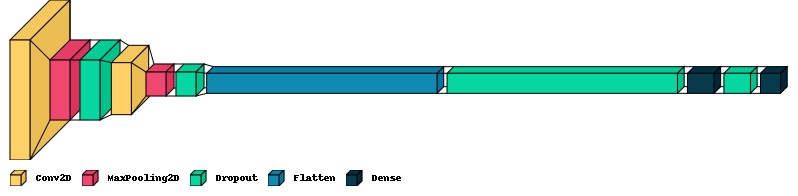

In [20]:
# plotting the model of model 1

visualkeras.layered_view(model_1, legend=True)

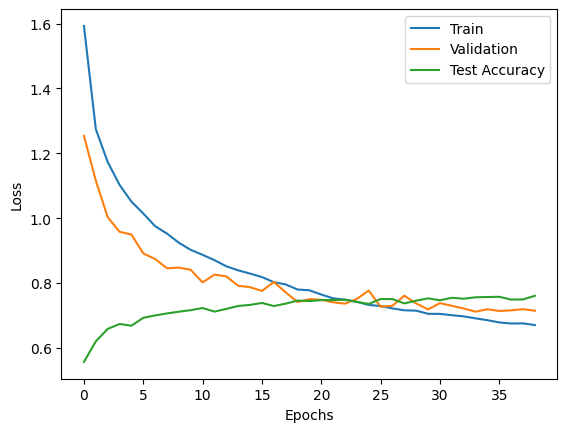

In [21]:
# model 1 evaluation

plt.plot(model_1_history.history['loss'])
plt.plot(model_1_history.history['val_loss'])
plt.plot(model_1_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation', 'Test Accuracy'])
plt.savefig('model_1_graph.png')
plt.show()

In [22]:
# model 1 scores

m1_score = model_1.evaluate(X_test, Y_test, verbose=2)
print("Test loss:", m1_score[0])
print("Test accuracy:", m1_score[1])

313/313 - 1s - loss: 0.7142 - accuracy: 0.7604 - 704ms/epoch - 2ms/step
Test loss: 0.7142286896705627
Test accuracy: 0.7603999972343445


### Model 2 - adding a layer
Adding a third convolutional layer

#### Building the model

In [23]:
# model 2 architecture

model_2 = Sequential()

model_2.add(Conv2D(32,(3,3),input_shape = (32,32,3),activation='relu'))
model_2.add(MaxPooling2D(pool_size = (2,2)))
model_2.add(Dropout(0.2)) 

model_2.add(Conv2D(64,(3,3),input_shape = (32,32,3),activation='relu'))
model_2.add(MaxPooling2D(pool_size = (2,2)))
model_2.add(Dropout(0.2)) 

model_2.add(Conv2D(128,(3,3),input_shape = (32,32,3),activation='relu'))
model_2.add(MaxPooling2D(pool_size = (2,2)))
model_2.add(Dropout(0.2)) 

model_2.add(Flatten())
model_2.add(Dropout(0.3))

model_2.add(Dense(265, activation ='relu'))
model_2.add(Dropout(0.4))

model_2.add(Dense(10, activation ='softmax'))

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 6, 6, 64)         

#### Training the model

In [24]:
# compiling model 2
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model 2 fitting
model_2_history = model_2.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), callbacks = [es])

Epoch 1/100
1563/1563 [==============================] - 18s 11ms/step - loss: 1.6630 - accuracy: 0.3831 - val_loss: 1.2989 - val_accuracy: 0.5379
Epoch 2/100
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3344 - accuracy: 0.5219 - val_loss: 1.1448 - val_accuracy: 0.5981
Epoch 3/100
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2198 - accuracy: 0.5652 - val_loss: 1.0736 - val_accuracy: 0.6194
Epoch 4/100
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1427 - accuracy: 0.5961 - val_loss: 1.0010 - val_accuracy: 0.6531
Epoch 5/100
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1007 - accuracy: 0.6122 - val_loss: 0.9396 - val_accuracy: 0.6705
Epoch 6/100
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0644 - accuracy: 0.6239 - val_loss: 0.9354 - val_accuracy: 0.6723
Epoch 7/100
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0311 - accuracy: 0.6357 - val_loss: 0

#### Evaluating the model

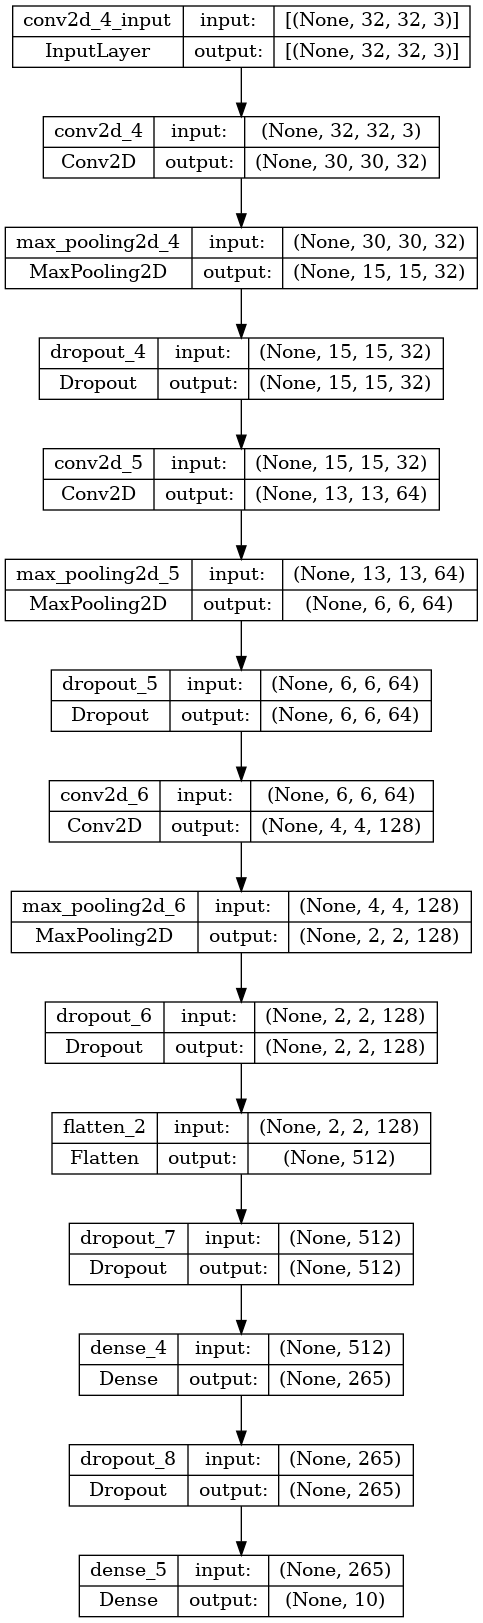

In [25]:
# plotting the architecture of model 2

plot_model(model_2, show_shapes=True, show_layer_names=True)

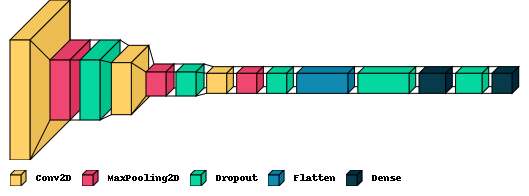

In [26]:
# plotting the model of model 2

visualkeras.layered_view(model_2, legend=True)

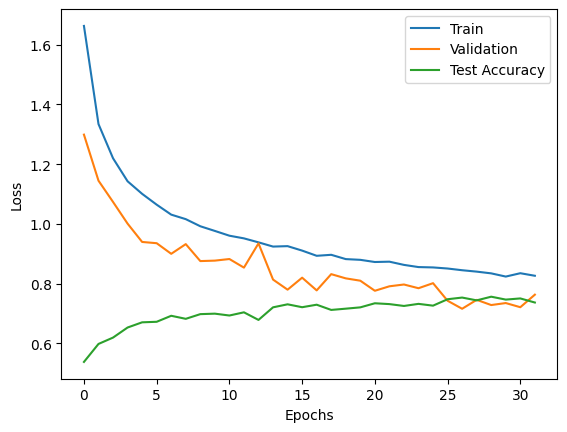

In [27]:
# model 2 evaluation

plt.plot(model_2_history.history['loss'])
plt.plot(model_2_history.history['val_loss'])
plt.plot(model_2_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation', 'Test Accuracy'])
plt.savefig('model_2_graph.png')
plt.show()

In [28]:
# model 2 scores

m2_score = model_2.evaluate(X_test, Y_test, verbose=2)
print("Test loss:", m2_score[0])
print("Test accuracy:", m2_score[1])

313/313 - 1s - loss: 0.7631 - accuracy: 0.7368 - 782ms/epoch - 2ms/step
Test loss: 0.7630867958068848
Test accuracy: 0.7368000149726868


### Model 3 - batch normalization

Adding batch normalization layers

#### Building the model

In [29]:
# model 3 architecture

model_3 = Sequential()

model_3.add(Conv2D(32,(3,3),input_shape = (32,32,3),activation='relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size = (2,2)))
model_3.add(Dropout(0.2)) 

model_3.add(Conv2D(64,(3,3),input_shape = (32,32,3),activation='relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size = (2,2)))
model_3.add(Dropout(0.2)) 

model_3.add(Conv2D(128,(3,3),input_shape = (32,32,3),activation='relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size = (2,2)))
model_3.add(Dropout(0.2)) 

model_3.add(Flatten())
model_3.add(Dropout(0.3))

model_3.add(Dense(265, activation ='relu'))
model_3.add(Dropout(0.4))

model_3.add(Dense(10, activation ='softmax'))

model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 64)      

#### Training the model

In [30]:
# compiling model 3
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model 2 fitting
model_3_history = model_3.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), callbacks = [es])

Epoch 1/100
1563/1563 [==============================] - 24s 15ms/step - loss: 1.7232 - accuracy: 0.3878 - val_loss: 2.4003 - val_accuracy: 0.3430
Epoch 2/100
1563/1563 [==============================] - 23s 15ms/step - loss: 1.3624 - accuracy: 0.5097 - val_loss: 1.1607 - val_accuracy: 0.5756
Epoch 3/100
1563/1563 [==============================] - 23s 15ms/step - loss: 1.2267 - accuracy: 0.5640 - val_loss: 1.4041 - val_accuracy: 0.5030
Epoch 4/100
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1514 - accuracy: 0.5942 - val_loss: 1.1186 - val_accuracy: 0.6104
Epoch 5/100
1563/1563 [==============================] - 24s 15ms/step - loss: 1.0824 - accuracy: 0.6211 - val_loss: 1.1114 - val_accuracy: 0.6018
Epoch 6/100
1563/1563 [==============================] - 24s 15ms/step - loss: 1.0375 - accuracy: 0.6372 - val_loss: 0.9099 - val_accuracy: 0.6802
Epoch 7/100
1563/1563 [==============================] - 23s 14ms/step - loss: 0.9892 - accuracy: 0.6567 - val_loss: 0

#### Evaluating the model

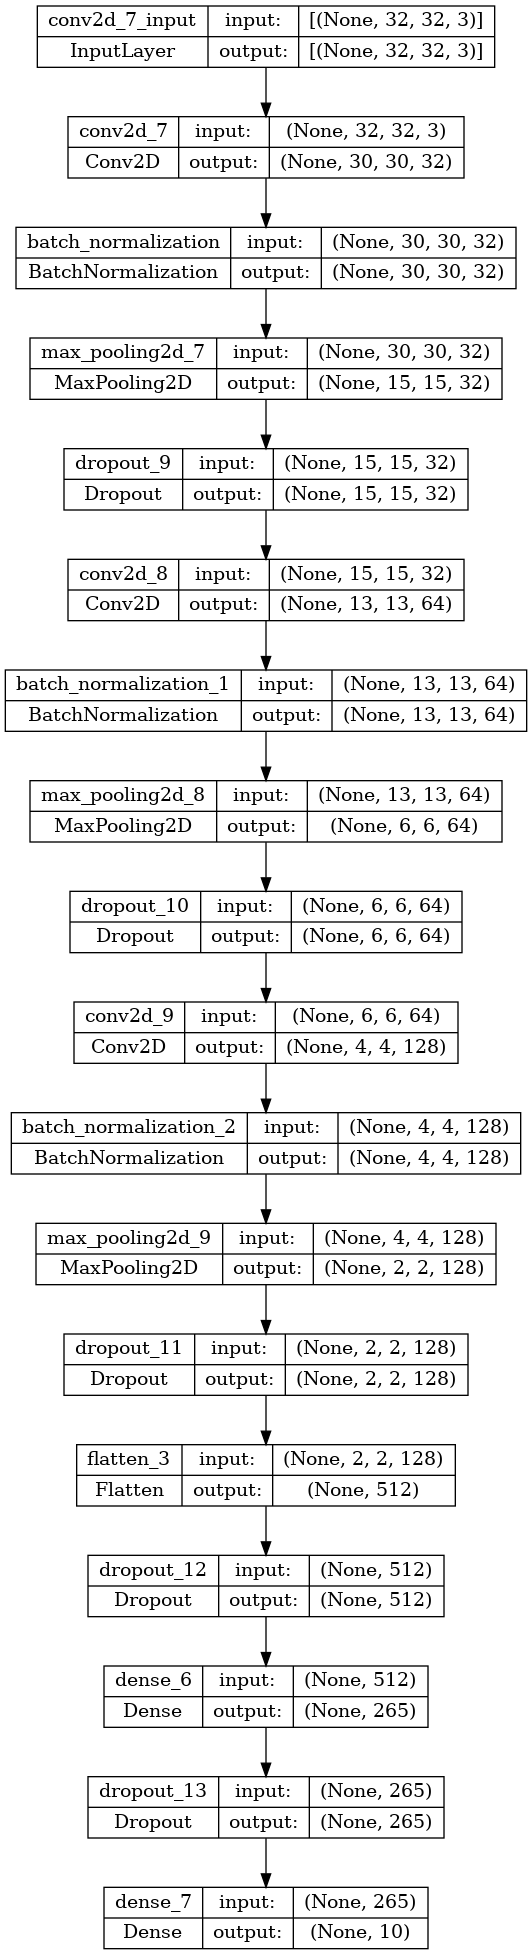

In [31]:
# plotting the architecture of model 3

plot_model(model_3, show_shapes=True, show_layer_names=True)

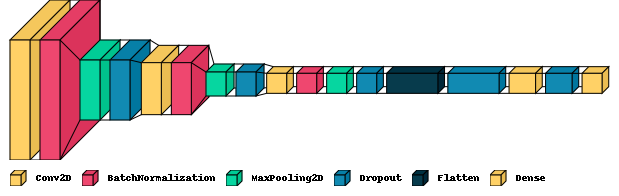

In [32]:
# plotting the model of model 3

visualkeras.layered_view(model_3, legend=True)

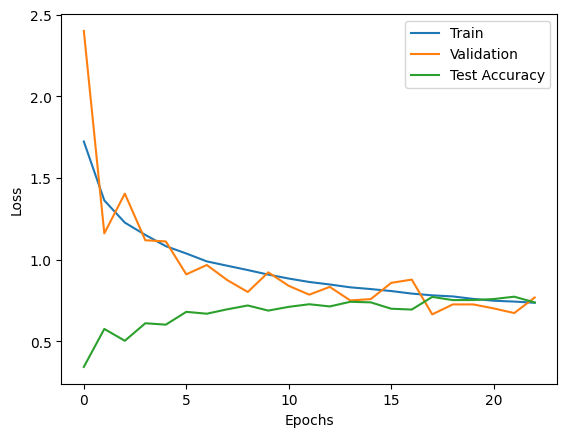

In [33]:
# model 3 evaluation

plt.plot(model_3_history.history['loss'])
plt.plot(model_3_history.history['val_loss'])
plt.plot(model_3_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation', 'Test Accuracy'])
plt.savefig('model_3_graph.png')
plt.show()

In [34]:
# model 3 scores

m3_score = model_3.evaluate(X_test, Y_test, verbose=2)
print("Test loss:", m3_score[0])
print("Test accuracy:", m3_score[1])

313/313 - 1s - loss: 0.7680 - accuracy: 0.7380 - 1s/epoch - 4ms/step
Test loss: 0.7680168747901917
Test accuracy: 0.7379999756813049


### Model 4 - adding layers convolutional 

#### Building the model

In [35]:
# model 4 architecture

model_4 = Sequential()

model_4.add(Conv2D(32,(3,3),input_shape = (32,32,3),activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Conv2D(32,(3,3),input_shape = (32,32,3),activation='relu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size = (1, 1)))
model_4.add(Dropout(0.2)) 

model_4.add(Conv2D(64,(3,3),input_shape = (32,32,3),activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Conv2D(64,(3,3),input_shape = (32,32,3),activation='relu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size = (1, 1)))
model_4.add(Dropout(0.2)) 

model_4.add(Conv2D(128,(3,3),input_shape = (32,32,3),activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Conv2D(128,(3,3),input_shape = (32,32,3),activation='relu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size = (1, 1)))
model_4.add(Dropout(0.2)) 

model_4.add(Flatten())
model_4.add(Dropout(0.3))

model_4.add(Dense(265, activation ='relu'))
model_4.add(Dropout(0.4))

model_4.add(Dense(10, activation ='softmax'))

model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_3 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_4 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 28, 28, 32)       0         
 g2D)                                                            
                                                      

#### Training the model

In [36]:
# compiling model 4
model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model 3 fitting
model_4_history = model_4.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), callbacks = [es])

Epoch 1/100
1563/1563 [==============================] - 232s 148ms/step - loss: 2.2056 - accuracy: 0.3469 - val_loss: 1.6727 - val_accuracy: 0.4479
Epoch 2/100
1563/1563 [==============================] - 230s 147ms/step - loss: 1.4533 - accuracy: 0.4882 - val_loss: 1.2304 - val_accuracy: 0.5645
Epoch 3/100
1563/1563 [==============================] - 232s 148ms/step - loss: 1.2808 - accuracy: 0.5544 - val_loss: 1.0554 - val_accuracy: 0.6438
Epoch 4/100
1563/1563 [==============================] - 227s 145ms/step - loss: 1.1691 - accuracy: 0.5975 - val_loss: 1.1036 - val_accuracy: 0.6326
Epoch 5/100
1563/1563 [==============================] - 232s 149ms/step - loss: 1.0735 - accuracy: 0.6314 - val_loss: 0.9592 - val_accuracy: 0.6856
Epoch 6/100
1563/1563 [==============================] - 233s 149ms/step - loss: 0.9936 - accuracy: 0.6616 - val_loss: 1.0359 - val_accuracy: 0.6746
Epoch 7/100
1563/1563 [==============================] - 233s 149ms/step - loss: 0.9138 - accuracy: 0.6847

#### Evaluating the model

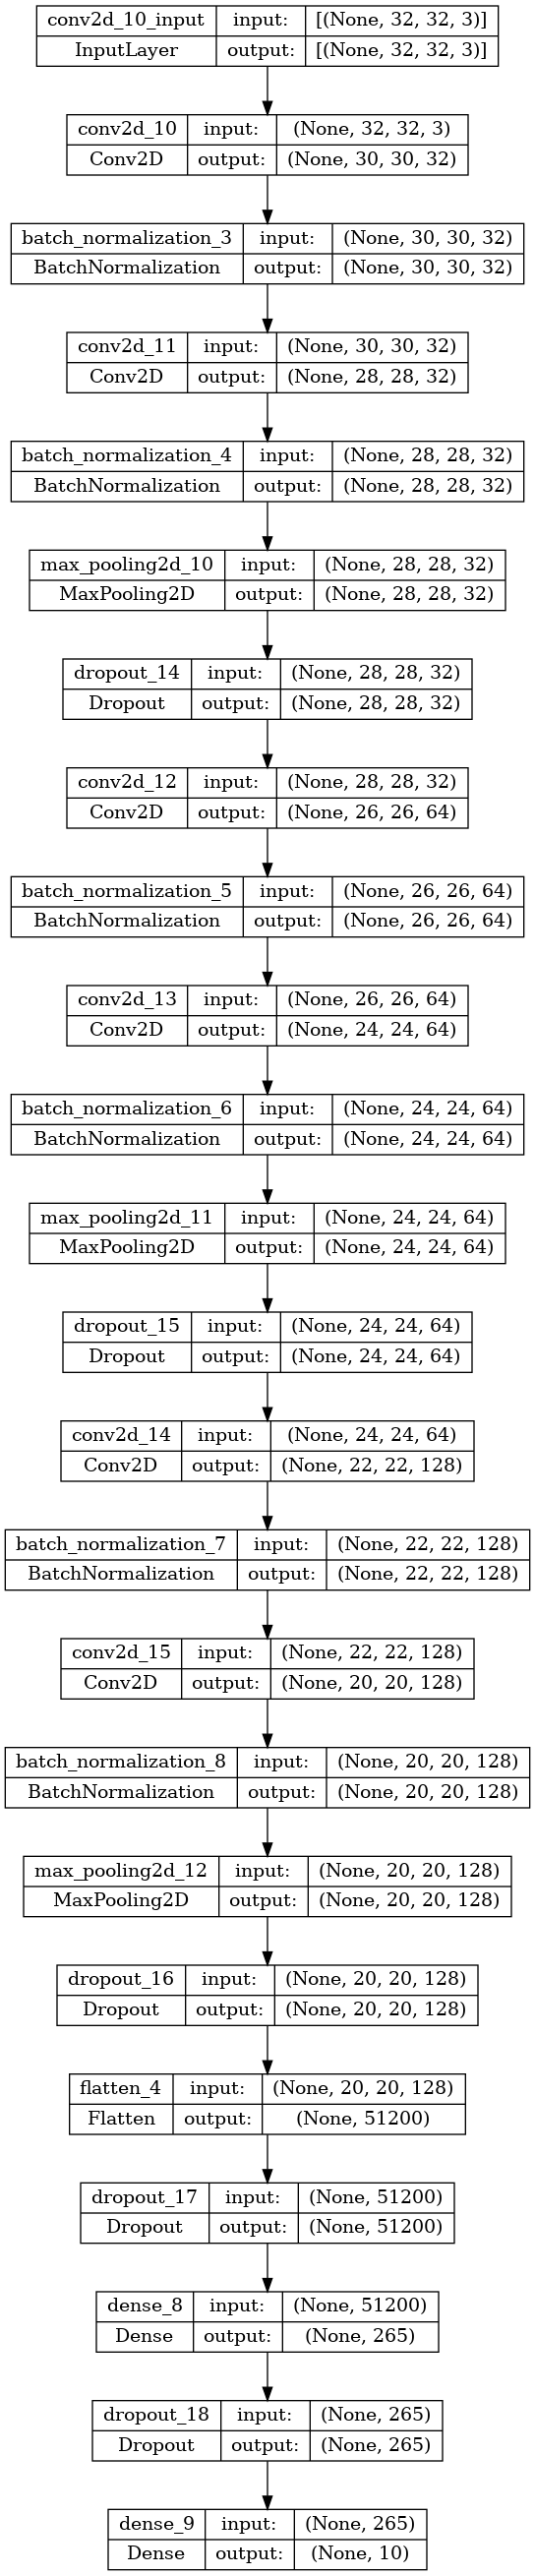

In [37]:
# plotting the architecture of model 4

plot_model(model_4, show_shapes=True, show_layer_names=True)

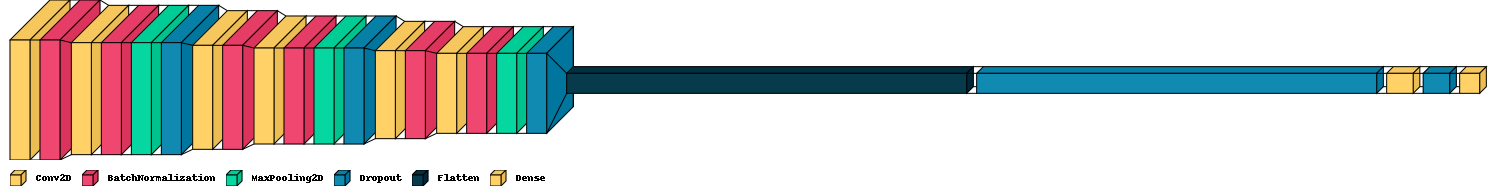

In [38]:
# plotting the model of model 4

visualkeras.layered_view(model_4, legend=True)

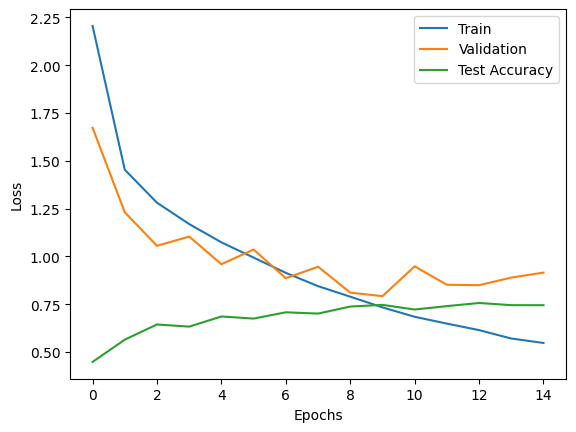

In [39]:
# model 4 evaluation

plt.plot(model_4_history.history['loss'])
plt.plot(model_4_history.history['val_loss'])
plt.plot(model_4_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation', 'Test Accuracy'])
plt.savefig('model_4_graph.png')
plt.show()

In [40]:
# model 4 scores

m4_score = model_4.evaluate(X_test, Y_test, verbose=2)
print("Test loss:", m4_score[0])
print("Test accuracy:", m4_score[1])

313/313 - 11s - loss: 0.9151 - accuracy: 0.7446 - 11s/epoch - 34ms/step
Test loss: 0.9151085019111633
Test accuracy: 0.7445999979972839


## Data Augmentation

### Model 5 - improving the filters and kernels (more compelx model)

#### Augmenting the data

In [41]:
# augmenting data

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

datagen.fit(X_train)
datagen

In [42]:
X_aug_train = datagen.flow(X_train, shuffle=False, batch_size=1)

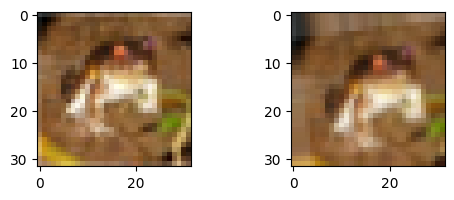

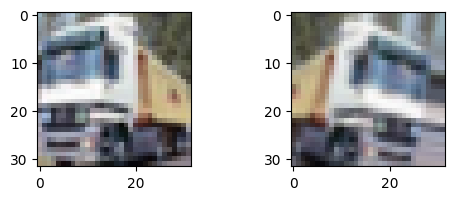

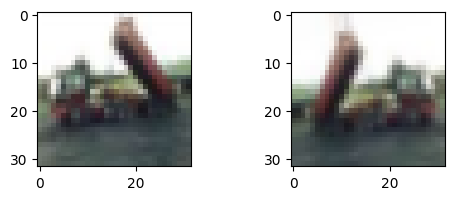

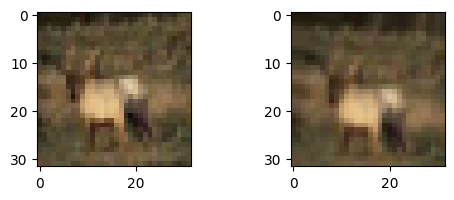

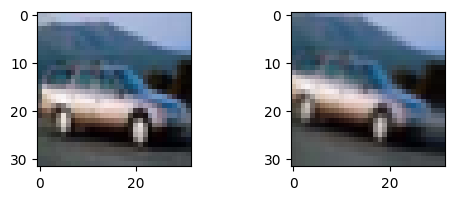

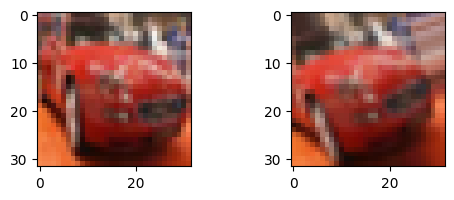

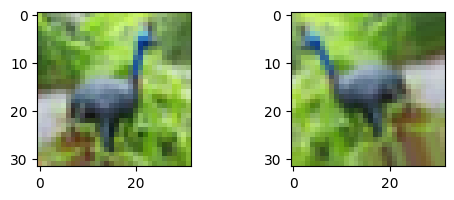

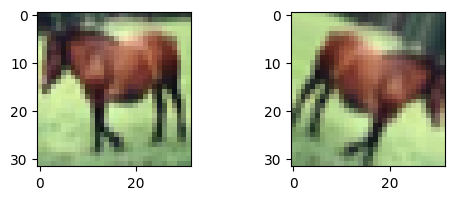

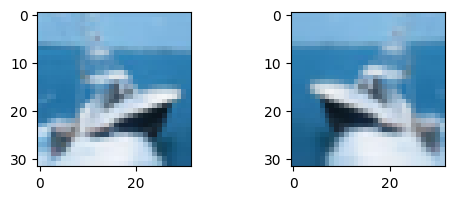

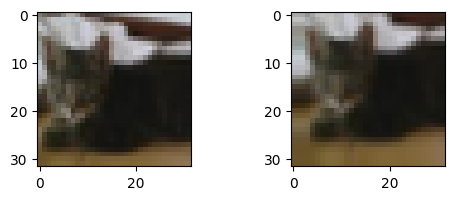

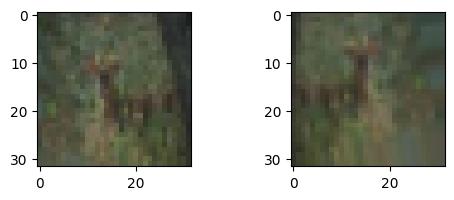

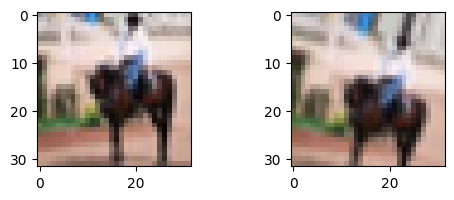

In [43]:
# checking the images created

import numpy as np

for i, (raw_image, augmented_image) in enumerate(zip(X_train, X_aug_train)):
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2))
    ax1.imshow(raw_image)
    ax2.imshow(augmented_image[0])
    plt.show()
    
    if i > 10:
        break

#### Building the model

In [44]:
# Define the model architecture
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(1, 1)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), input_shape=(32, 32, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), input_shape=(32, 32, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(1, 1)))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (3, 3), input_shape=(32, 32, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), input_shape=(32, 32, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(1, 1)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dropout(0.3))

    model.add(Dense(265, activation='relu'))
    model.add(Dropout(0.4))

    model.add(Dense(10, activation='softmax'))

    return model

model_5 = create_model()

model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_9 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_10 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 28, 28, 32)       0         
 g2D)                                                            
                                                      

#### Training the model

In [45]:
# compiling model 5
model_5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# model 5 fitting
model_5_history = model_5.fit(
    datagen.flow(X_train, Y_train, batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    epochs=100,
    validation_data=(X_test, Y_test),
    callbacks=[es])

Epoch 1/100
1562/1562 [==============================] - 237s 151ms/step - loss: 2.3502 - accuracy: 0.3069 - val_loss: 1.5313 - val_accuracy: 0.4498
Epoch 2/100
1562/1562 [==============================] - 234s 150ms/step - loss: 1.6500 - accuracy: 0.4027 - val_loss: 1.5798 - val_accuracy: 0.4854
Epoch 3/100
1562/1562 [==============================] - 235s 150ms/step - loss: 1.5235 - accuracy: 0.4551 - val_loss: 1.5373 - val_accuracy: 0.5162
Epoch 4/100
1562/1562 [==============================] - 235s 151ms/step - loss: 1.4138 - accuracy: 0.5025 - val_loss: 1.3190 - val_accuracy: 0.5662
Epoch 5/100
1562/1562 [==============================] - 231s 148ms/step - loss: 1.3378 - accuracy: 0.5317 - val_loss: 1.2318 - val_accuracy: 0.5968
Epoch 6/100
1562/1562 [==============================] - 229s 147ms/step - loss: 1.2615 - accuracy: 0.5583 - val_loss: 1.4394 - val_accuracy: 0.5879
Epoch 7/100
1562/1562 [==============================] - 230s 147ms/step - loss: 1.2041 - accuracy: 0.5849

#### Evaluating the model

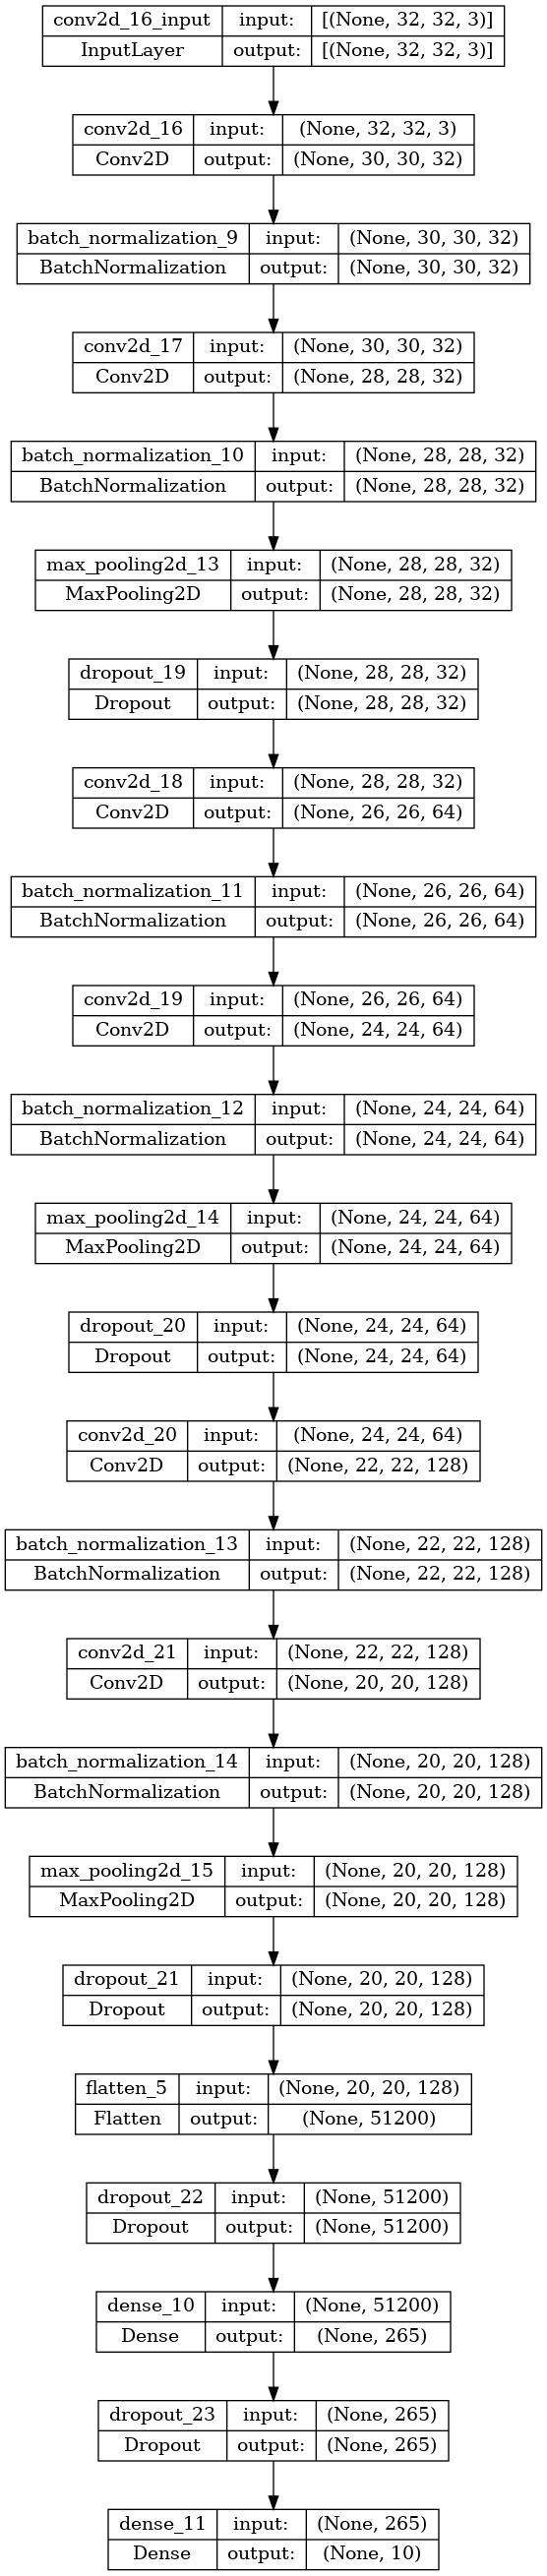

In [46]:
# plotting the architecture of model 5

plot_model(model_5, show_shapes=True, show_layer_names=True)

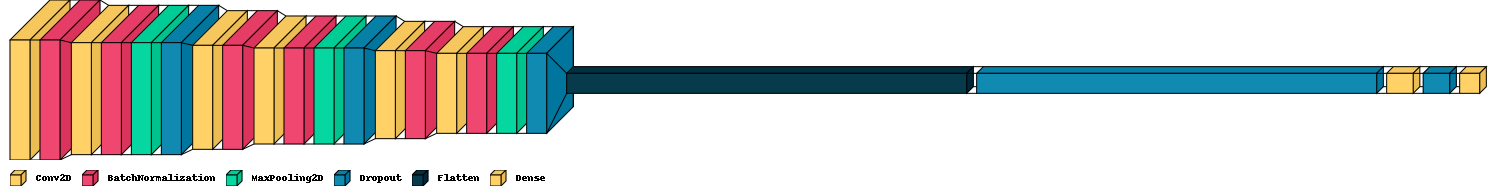

In [47]:
# plotting the model of model 5

visualkeras.layered_view(model_5, legend=True)

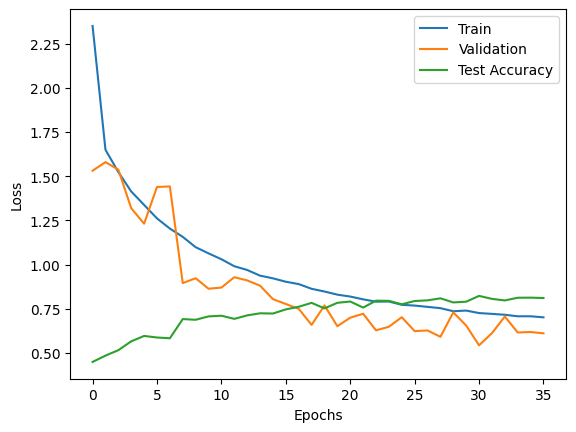

In [48]:
# model 5 evaluation

plt.plot(model_5_history.history['loss'])
plt.plot(model_5_history.history['val_loss'])
plt.plot(model_5_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation', 'Test Accuracy'])
plt.savefig('model_5_graph.png')
plt.show()

In [49]:
# model 5 scores

m5_score = model_5.evaluate(datagen.flow(X_test, Y_test, batch_size=32), verbose=0)
print("Test loss:", m5_score[0])
print("Test accuracy:", m5_score[1])

Test loss: 0.6285800337791443
Test accuracy: 0.791100025177002


## Evaluation

### Comparing the scores

In [50]:
# comparing the models test loss and test accuracy

data = {
    'Model': ['Base Model', 'Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'],
    'Test Loss': [base_model_score[0], m1_score[0], m2_score[0], m3_score[0], m4_score[0], m5_score[0]],
    'Test Accuracy': [base_model_score[1], m1_score[1], m2_score[1], m3_score[1], m4_score[1], m5_score[1]]}

df = pd.DataFrame(data)

df.set_index('Model', inplace=True)
df

,Test Loss,Test Accuracy
Model,,
Base Model,1.193327,0.6881
Model 1,0.714229,0.7604
Model 2,0.763087,0.7368
Model 3,0.768017,0.7380
Model 4,0.915109,0.7446
Model 5,0.628580,0.7911


### Plotting the graphs

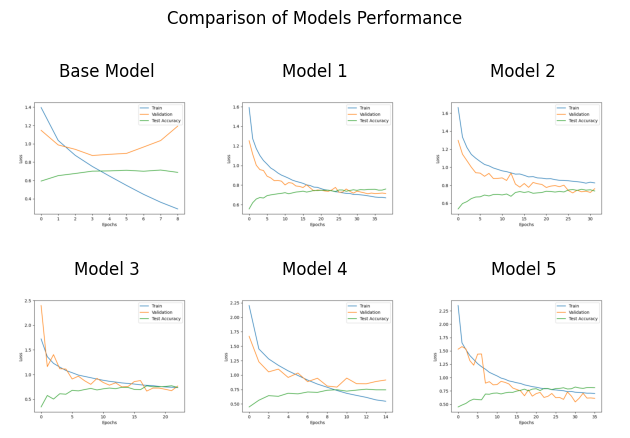

In [51]:
filenames = ['base_model_graph.png', 'model_1_graph.png', 'model_2_graph.png', 
             'model_3_graph.png', 'model_4_graph.png', 'model_5_graph.png']

num_rows = 2  # rows in the grid
num_cols = 3  # columns in the grid

# subplots
fig, axes = plt.subplots(num_rows, num_cols)


for i, ax in enumerate(axes.flat):
    # load graphs
    graph_img = mpimg.imread(filenames[i])
    # plot
    ax.imshow(graph_img)
    ax.axis('off')
    # add titles
    if i == 0:
        ax.set_title("Base Model")
    else:
        ax.set_title(f'Model {i}')

fig.suptitle("Comparison of Models Performance")
plt.tight_layout()
plt.show()

### Heatmap for final model

313/313 [==============================] - 11s 33ms/step


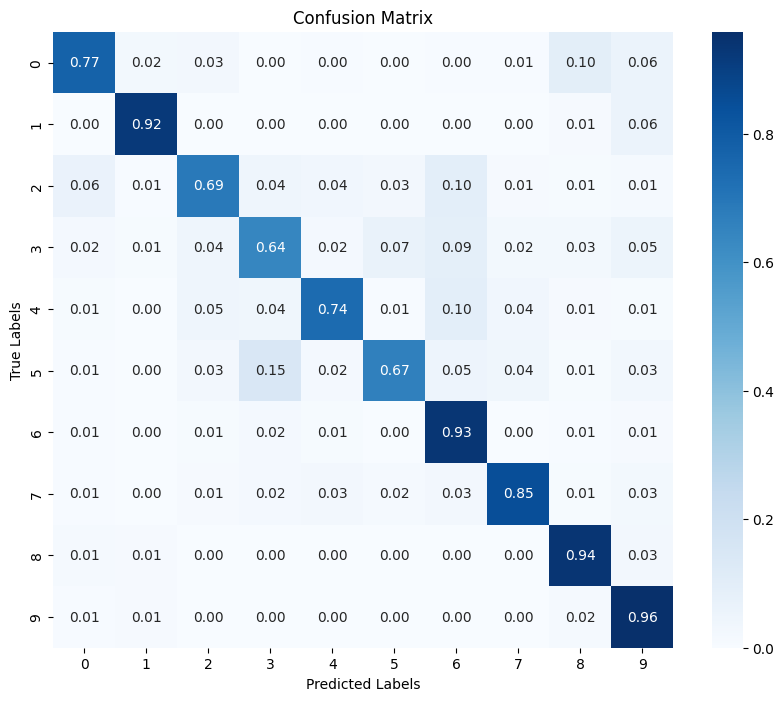

In [52]:
# get predictions
predictions = model_5.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# onde-hot-encode
true_labels = np.argmax(Y_test, axis=1)

# confusion matrix
confusion_matrix = np.zeros((10, 10))

for true_label, predicted_label in zip(true_labels, predicted_labels):
    confusion_matrix[true_label][predicted_label] += 1

# normalising the matrix
confusion_matrix = confusion_matrix / np.sum(confusion_matrix, axis=1, keepdims=True)

# plotting
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt=".2f", xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()